Imports

In [1]:
import numpy as np
from Reader import Reader as rd
import Camera
import SingleImage
from ImagePair import ImagePair
import pandas as pd
import matplotlib.pyplot as plt

Load x-point data

In [2]:
pic_points_3574 = rd.photoModXMLReader('181219/Lab6_points_3574.x-points')[2][1::2,1:].astype(float)
pic_points_3575 = rd.photoModXMLReader('181219/Lab6_points_3575.x-points')[2][0::2,1:].astype(float)
np.savetxt('pic_3574.csv', pic_points_3574, delimiter=',', fmt='%s')
np.savetxt('pic_3575.csv', pic_points_3575, delimiter=',', fmt='%s')

Loading camera parmaeters fiducials and mesured points + creating img objects

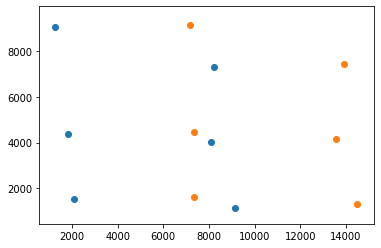

In [3]:
camraw = rd.ReadCamFile('rc30.cam')
tagraw3574 = rd.Readtxtfile('fiducialsImg3574.txt')
tagraw3575 = rd.Readtxtfile('fiducialsImg3575.txt')
points_control_ground = (rd.photoModXMLReader('Lab5.x-points')[1][:,2:5]).astype(float)
points_control_pic_3574 = (rd.photoModXMLReader('Lab5.x-points')[2][1::2,1:]).astype(float)
points_control_pic_3575 = (rd.photoModXMLReader('Lab5.x-points')[2][0::2,1:]).astype(float)

plt.scatter(points_control_pic_3574[:,0],points_control_pic_3574[:,1])
plt.scatter(points_control_pic_3575[:,0],points_control_pic_3575[:,1])
plt.axis('equal')
plt.show()

camera = Camera.Camera(camraw['f'], np.array([camraw['xp'],camraw['yp']]),\
                        np.array([camraw['k0'],camraw['k1'],camraw['k2']]),\
                        np.array([camraw['p1'],camraw['p2'],camraw['p3']]),\
                        camraw['fiducials'])


image3574 = SingleImage.SingleImage(camera)
image3575 = SingleImage.SingleImage(camera)

Inner orientation + Extrerior orientation

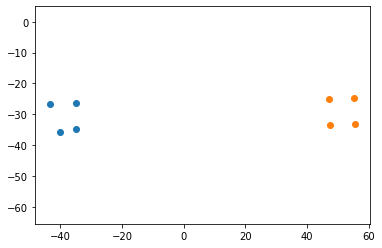

In [4]:
inner_or_3574 = image3574.ComputeInnerOrientation(tagraw3574[0:7,:])
inner_or_3575 = image3575.ComputeInnerOrientation(tagraw3575[0:7,:])

outer_or_3574 = image3574.ComputeExteriorOrientation(points_control_pic_3574,points_control_ground,0.000001)
outer_or_3575 = image3575.ComputeExteriorOrientation(points_control_pic_3575,points_control_ground,0.000001)

picpoints_3574_mm = image3574.ImageToCamera(pic_points_3574)
picpoints_3575_mm = image3575.ImageToCamera(pic_points_3575)

plt.scatter(picpoints_3574_mm[:,0],picpoints_3574_mm[:,1])
plt.scatter(picpoints_3575_mm[:,0],picpoints_3575_mm[:,1])
plt.axis('equal')
plt.show()

# print('Camera points 3574 (mm):\n', pd.DataFrame(picpoints_3574_mm), '\n')
# print('Camera points 3575 (mm):\n', pd.DataFrame(picpoints_3575_mm), '\n')
np.savetxt('picpoints_3574_mm.csv', picpoints_3574_mm, delimiter=',', fmt='%s')
np.savetxt('picpoints_3575_mm.csv', picpoints_3575_mm, delimiter=',', fmt='%s')

Part B

In [5]:

set3574_3575 = ImagePair(image3574, image3575)

lab6_points_ground = set3574_3575.ImagesToGround(pic_points_3574, pic_points_3575, Method='geometric')

print(pd.DataFrame(lab6_points_ground))
np.savetxt('lab6_points_ground.csv', lab6_points_ground[0].astype(float), delimiter=',', fmt='%s')
np.savetxt('lab6_points_ground_dis.csv', lab6_points_ground[1].astype(float), delimiter=',', fmt='%s')


                                                   0
0  [[[202361.88372766133], [742290.3762847772], [...
1  [[[128.96477473065897], [138.37140380070196], ...


Calculating area

In [6]:
def area(x,y):
    """
    :param x: ordinate set of x
    :param y: ordinate set of y
    """
    return np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))*0.5

area_world = area(lab6_points_ground[0][:,0].astype(float), lab6_points_ground[0][:,1].astype(float))
area_camera = area(picpoints_3574_mm[:,0], picpoints_3574_mm[:,1])/1000000
print('area world:', area_world)
print('area camera:', area_camera)
print(area_world/area_camera)
print(np.sqrt(area_world/area_camera))

area world: 11.1199951171875
area camera: 6.003823692797687e-05
185215.21760419582
430.3663760148971
